In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split, cross_val_score 

# Importing and splitting the data 

In [2]:
data = np.genfromtxt("fuel_data.csv", delimiter = ',') 
X = data.T[0:7].T 
Y = data.T[-1].T 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state= 42)  

print np.shape(X_train) 
print np.shape(X_test) 
print np.shape(Y_train) 
print np.shape(Y_test) 

(294L, 7L)
(98L, 7L)
(294L,)
(98L,)


# Using cross validation for tuning the hyperparameters 

In [3]:
cv = [] 
n_tr = []  
for n_tree in range(1,100,5): 
    regr = RandomForestRegressor(n_estimators= n_tree, criterion='mse', max_depth= 5, max_features='sqrt', bootstrap=True, random_state=42)
    cv.append(np.mean(-cross_val_score(regr, X, Y, cv = 4, scoring = 'neg_mean_squared_error')))     
    n_tr.append(n_tree)    

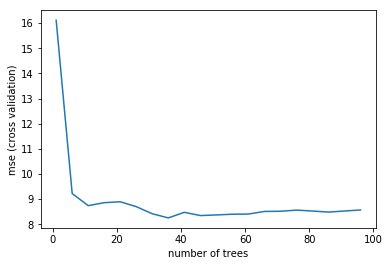

In [4]:
plt.plot(n_tr,cv)  
plt.xlabel('number of trees') 
plt.ylabel('mse (cross validation)') 
plt.show() 
#print n_tr[cv.index(min(cv))] 
#print min(cv) 

In [5]:
cv1 = []   
d_tr = []  
for d in range(1,7): 
    regr = RandomForestRegressor(n_estimators= 36, criterion='mse', max_depth= d, max_features='sqrt', bootstrap=True, random_state=42)
    cv1.append(np.mean(cross_val_score(regr, X, Y, cv = 4, scoring = 'neg_mean_squared_error')))      
    d_tr.append(d) 

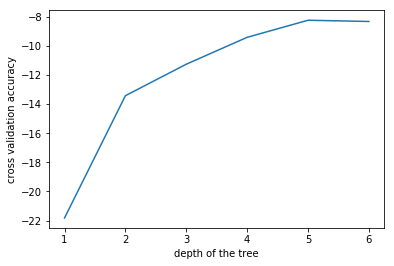

In [6]:
plt.plot(d_tr,cv1)    
plt.xlabel('depth of the tree')
plt.ylabel('cross validation accuracy')
plt.show() 
#print d_tr[cv1.index(min(cv1))]
#print min(cv) 

# Creating the model class for regression

In [7]:
regr = RandomForestRegressor(n_estimators= 36, criterion='mse', max_depth= 5,max_features='sqrt', bootstrap=True, random_state=42)

In [8]:
regr.fit(X_train,Y_train)        #Training the model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=36, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

# Getting the importance of indiviual features

In [9]:
regr.feature_importances_  

array([ 0.17517726,  0.3013134 ,  0.14647903,  0.16692311,  0.02820658,
        0.10649102,  0.0754096 ])

# Getting the predictions

In [10]:
Y_pred = regr.predict(X_test)
Y_pred_train = regr.predict(X_train)  

# MSE and R2

In [11]:
print("Mean squared error (train): %.8f"
      % mean_squared_error(Y_train,Y_pred_train))
print("R2(train): %.2f"
      % r2_score(Y_train,Y_pred_train))   

Mean squared error (train): 4.54764799
R2(train): 0.92


In [12]:
print("Mean squared error (test): %.8f"
      % mean_squared_error(Y_test,Y_pred))
print("R2(test): %.2f"
      % r2_score(Y_test,Y_pred))  

Mean squared error (test): 7.42251248
R2(test): 0.88


# Mean Absolute Error

In [13]:
def max_abs_error(data1,data2):
    Y_error = []
    for i in range(len(data1)): 
        Y_error.append(100*(abs(data1[i] - data2[i])/data1[i])) 
    return Y_error

In [14]:
MAE_test = max_abs_error(Y_test, Y_pred)
MAE_train = max_abs_error(Y_train, Y_pred_train)
print max(MAE_test) 
print max(MAE_train)          

50.6484279966
33.5464242052


# Maximum Absolute Error

In [15]:
print("mean_absolute_error(test): %.2f"
      % mean_absolute_error(Y_test, Y_pred)) 

print("mean_absolute_error(train): %.2f"
      % mean_absolute_error(Y_train, Y_pred_train))   

mean_absolute_error(test): 1.86
mean_absolute_error(train): 1.60
